# Step 1: Data Import and Preliminary Analysis

In [32]:
import pandas as pd

In [33]:
# Load the dataset
file_path = 'userbehaviour.csv'
data = pd.read_csv(file_path)

In [34]:
# Display the first few rows of the dataset
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [35]:
# Check for null values
null_values = data.isnull().sum()

In [36]:
# Column information
column_info = data.info()

<class 'pandas.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    str    
dtypes: float64(2), int64(5), str(1)
memory usage: 62.6 KB


In [37]:
# Descriptive statistics
descriptive_stats = data.describe()

In [45]:
null_values

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [46]:
column_info

In [47]:
descriptive_stats

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


# Step 2: Check Screen Time Statistics 

In [48]:
# Screen time statistics
screen_time_stats = {
    'Highest': data['Average Screen Time'].max(),
    'Lowest': data['Average Screen Time'].min(),
    'Average': data['Average Screen Time'].mean()
}

screen_time_stats

{'Highest': np.float64(50.0),
 'Lowest': np.float64(0.0),
 'Average': np.float64(24.39039039039039)}

# Step 3: heck Amount Spent Statistics

In [49]:
# Amount spent statistics
amount_spent_stats = {
    'Highest': data['Average Spent on App (INR)'].max(),
    'Lowest': data['Average Spent on App (INR)'].min(),
    'Average': data['Average Spent on App (INR)'].mean()
}

amount_spent_stats

{'Highest': np.float64(998.0),
 'Lowest': np.float64(0.0),
 'Average': np.float64(424.4154154154154)}

# Step 4: Relationship Between Spending Capacity and Screen Time

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Separate active and uninstalled users
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

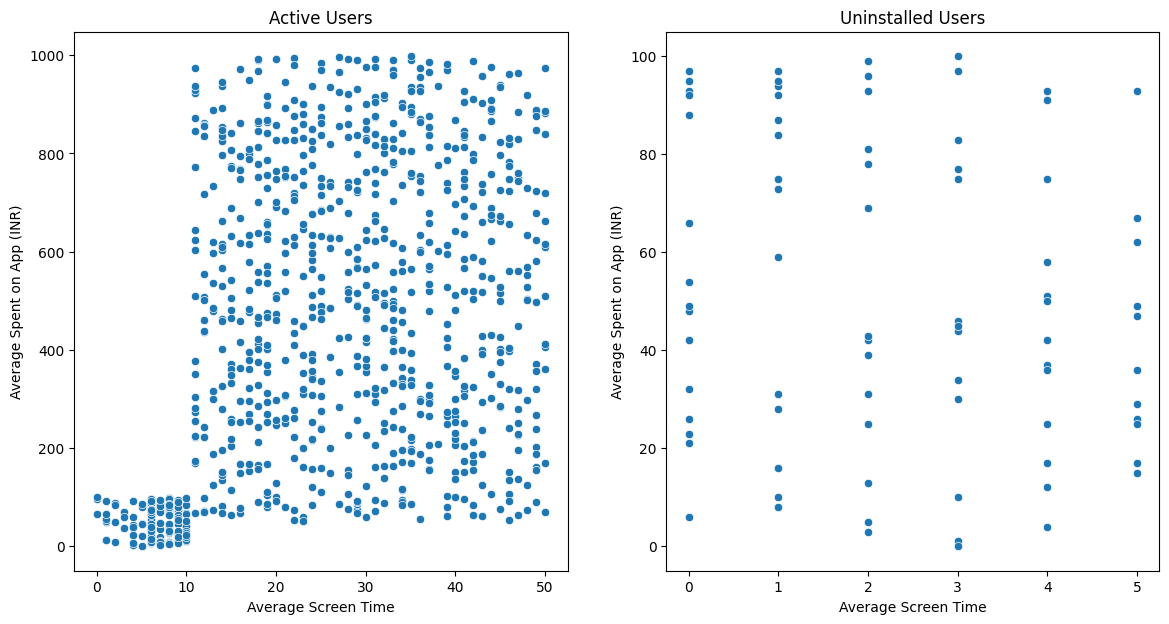

In [52]:
# Plot the relationship
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users')

plt.show()

# Step 5: Relationship Between Ratings and Screen Time

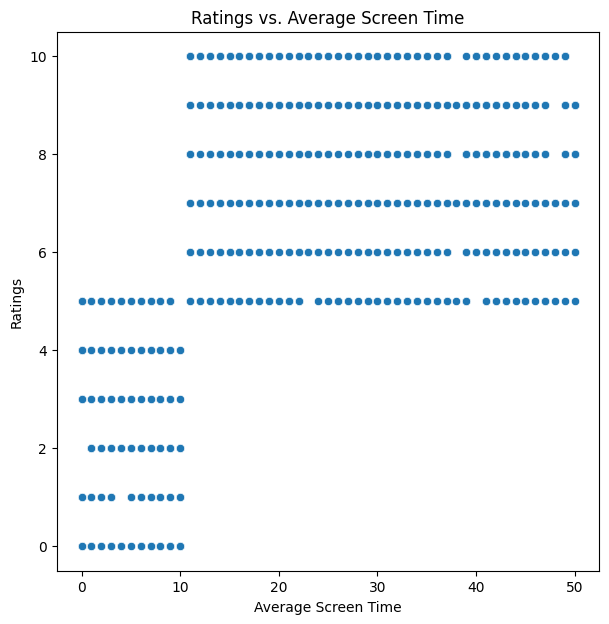

In [53]:
# Plot the relationship
plt.figure(figsize=(7, 7))
sns.scatterplot(x='Average Screen Time', y='Ratings', data=data)
plt.title('Ratings vs. Average Screen Time')
plt.show()

# Step 6: App User Segmentation using K-means Clustering

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
# Features for clustering
features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]

In [56]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [57]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

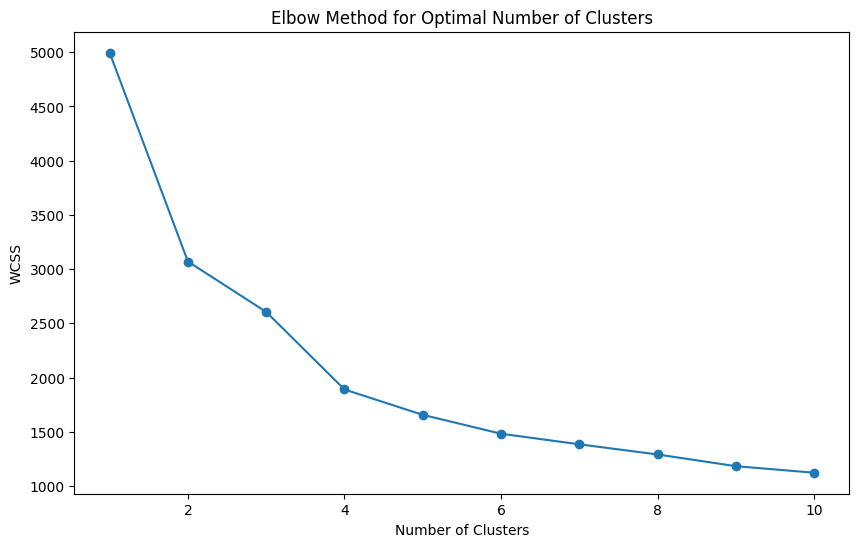

In [58]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
# Fit K-means with the selected number of clusters
optimal_clusters = 4  # This should be selected based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [60]:
# Number of segments
segments = data['Cluster'].nunique()
segments

4

# Step 7: Visualize the Segments

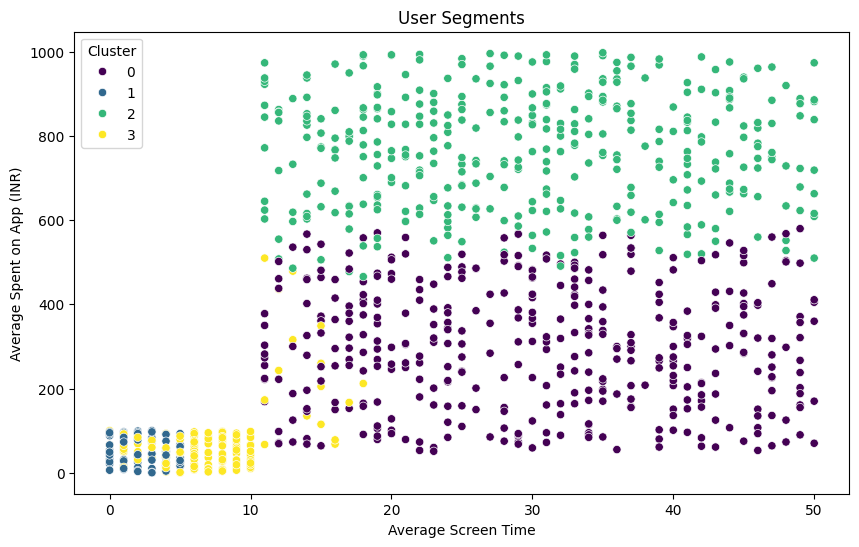

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Cluster', data=data, palette='viridis')
plt.title('User Segments')
plt.show()

# Step 8: Summary of Working

# Summary of Working

1. **Data Import and Initial Checks**:
   - Loaded the dataset `userbehaviour.csv`.
   - Checked for null values, column information, and descriptive statistics to understand the data's structure and summary.

2. **Screen Time Analysis**:
   - Calculated the highest, lowest, and average screen time of all users.

3. **Spending Analysis**:
   - Calculated the highest, lowest, and average amount spent by all users.

4. **Spending Capacity vs. Screen Time**:
   - Analyzed the relationship between spending capacity and screen time for active users and those who uninstalled the app.
   - Observed distinct patterns in spending and screen time between active and uninstalled users.

5. **Ratings vs. Screen Time**:
   - Analyzed the relationship between user ratings and average screen time.
   - Identified trends in how screen time correlates with user ratings.

6. **User Segmentation with K-means Clustering**:
   - Performed K-means clustering to segment users based on their behavior.
   - Determined the optimal number of clusters using the elbow method.
   - Found and visualized four user segments.

7. **Visualization of Segments**:
   - Visualized user segments using scatter plots to show distinctions between different user groups.

8. **Correlation Analysis**:
   - Calculated and visualized the correlation matrix between different numeric metrics to identify relationships among features.

9. **Anomaly Detection**:
   - Applied the Isolation Forest algorithm to detect anomalies in user behavior data.
   - Identified users with unusual behavior patterns.

# Step 9: Correlation Between Different Metrics 

In [62]:
# Drop non-numeric columns for correlation matrix
numeric_data = data.drop(columns=['userid', 'Status', 'Left Review'])  # 'userid', 'Status', and 'Left Review' are non-numeric

In [63]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

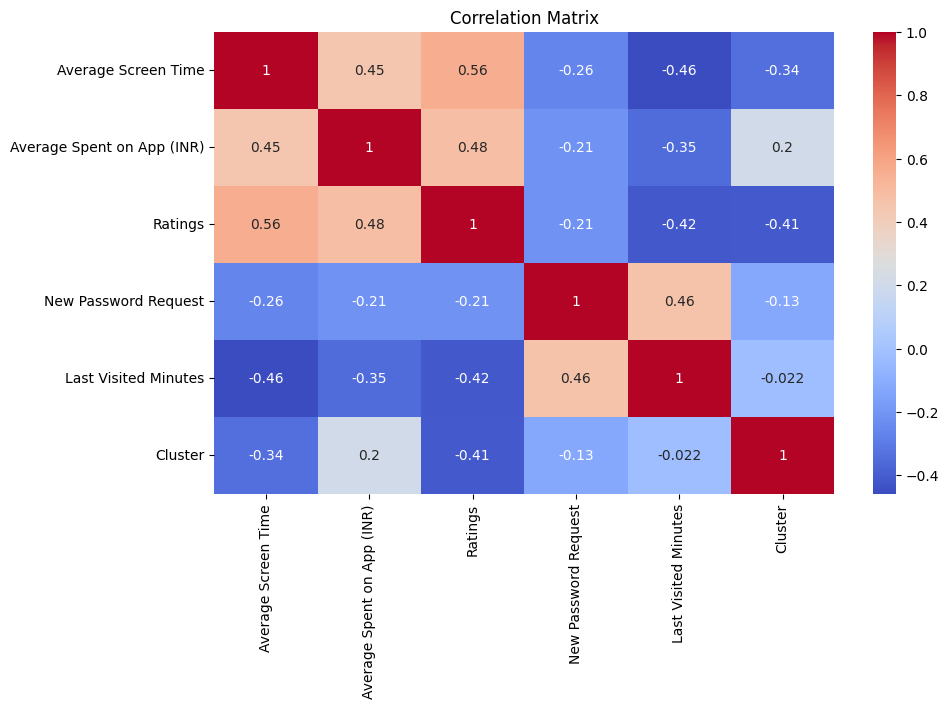

In [64]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 10: Anomaly Detection using Isolation Forest

In [65]:
from sklearn.ensemble import IsolationForest

In [66]:
# Fit the model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(scaled_features)

In [67]:
# Show results
anomalies = data[data['Anomaly'] == -1]
anomalies

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Cluster,Anomaly
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,1,-1
38,1039,1.0,97.0,0,1,7,37959,Uninstalled,1,-1
43,1044,4.0,93.0,0,2,8,49334,Uninstalled,1,-1
46,1047,3.0,34.0,1,5,6,39016,Uninstalled,1,-1
61,1062,5.0,67.0,0,2,6,30435,Uninstalled,1,-1
...,...,...,...,...,...,...,...,...,...,...
943,1944,4.0,42.0,0,4,5,32762,Uninstalled,1,-1
947,1948,2.0,3.0,1,3,14,16067,Uninstalled,1,-1
949,1950,0.0,95.0,0,1,10,16324,Uninstalled,1,-1
978,1979,1.0,73.0,0,3,13,45734,Uninstalled,1,-1
